# pandasVCF

### This example notebook describes simple usage of pandasVCFmulti, a module for parsing VCF files using the pandas library. pandasVCFmulti also handles single sample vcf files.  

# Libraries

In [1]:
#Import pdVCFsingle package
%matplotlib inline
%pylab inline
import sys
sys.path.append( '../src/' )
from pandasVCF import *
%config InlineBackend.figure_format = 'retina'
pd.options.mode.chained_assignment = None #supressing the chained assignment warnings

Populating the interactive namespace from numpy and matplotlib


# Example File Path

In [2]:
vcf_path = '../test_data/ALL.chr22.phase3_shapeit2_mvncall_integrated_v4.20130502.genotypes_10k.vcf.gz'


# Creating Vcf object

### Initiate Vcf object by specifying the sample_id string and the columns the user wants to include for parsing.  

###Only the CHROM, POS, REF, ALT, and FORMAT fields are required.

###Some VCF files are quite large and will not fit in memory, therefore the user can specify the chunksize which allows iteration through the VCF.  

In [3]:
vcf_chunk = VCF(vcf_path, sample_id='all', cols=['#CHROM', 'POS', 'REF', 'ALT', 'FORMAT', 'INFO', 'FILTER'], \
                chunksize=1000, n_cores=20)

In [4]:
%time vcf_chunk.get_vcf_df_chunk()


CPU times: user 38.7 s, sys: 528 ms, total: 39.2 s
Wall time: 38.9 s


0

In [5]:
vcf_chunk.df.info()
print 
print vcf_chunk.df.shape[1] * vcf_chunk.df.shape[0], 'Genotypes read'

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1000 entries, (22, 16050075, A, G) to (22, 16139996, G, T)
Columns: 2511 entries, CHROM to NA21144
dtypes: int64(1), object(2510)
memory usage: 19.2+ MB

2511000 Genotypes read


In [6]:
vcf_chunk.df.head()

CHROM       POS REF ALT FILTER  \
CHROM POS      REF ALT                                  
22    16050075 A   G      22  16050075   A   G   PASS   
      16050115 G   A      22  16050115   G   A   PASS   
      16050213 C   T      22  16050213   C   T   PASS   
      16050319 C   T      22  16050319   C   T   PASS   
      16050527 C   A      22  16050527   C   A   PASS   

                                                       INFO FORMAT HG00096  \
CHROM POS      REF ALT                                                       
22    16050075 A   G    AC=1;AF=0.000199681;AN=5008;NS=2504     GT     0|0   
      16050115 G   A    AC=32;AF=0.00638978;AN=5008;NS=2504     GT     0|0   
      16050213 C   T    AC=38;AF=0.00758786;AN=5008;NS=2504     GT     0|0   
      16050319 C   T    AC=1;AF=0.000199681;AN=5008;NS=2504     GT     0|0   
      16050527 C   A    AC=1;AF=0.000199681;AN=5008;NS=2504     GT     0|0   

                       HG00097 HG00099   ...   NA21128 NA21129 NA21130  \
CHROM POS      REF ALT                   ...                             
22    16050075 A   G       0|0     0|0   ...       0|0     0|0     0|0   
      16050115 G   A       0|0     0|0   ...       0|0     0|0     0|0   
      16050213 C   T       0|0     0|0   ...       0|0     0|0     0|0   
      16050319 C   T       0|0     0|0   ...       0|0     0|0     0|0   
      16050527 C   A       0|0     0|0   ...       0|0     0|0     0|0   

                       NA21133 NA21135 NA21137 NA21141 NA21142 NA21143 NA21144  
CHROM POS      REF ALT                                                          
22    16050075 A   G       0|0     0|0     0|0     0|0     0|0     0|0     0|0  
      16050115 G   A       0|0     0|0     0|0     0|0     0|0     0|0     0|0  
      16050213 C   T       0|0     0|0     0|0     0|0     0|0     0|0     0|0  
      16050319 C   T       0|0     0|0     0|0     0|0     0|0     0|0     0|0  
      16050527 C   A       0|0     0|0     0|0     0|0     0|0     0|0     0|0  

[5 rows x 2511 columns]

In [7]:
#checking stopIteration flag
vcf_chunk.stopIteration

False

### Adding Annotations

In [8]:
%time vcf_chunk.add_variant_annotations(inplace=True)  #split_columns={'AD':2, 'HQ':2},

CPU times: user 963 ms, sys: 141 ms, total: 1.1 s
Wall time: 2.47 s


0

In [9]:
vcf_chunk.df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 101737 entries, (22, 16050075, A, G) to (22, 16139996, G, T)
Data columns (total 15 columns):
sample_ids        101737 non-null object
multiallele       101737 non-null int64
phase             101737 non-null object
GT1               101737 non-null int64
GT2               101737 non-null int64
a1                101737 non-null object
a2                101737 non-null object
zygosity          101737 non-null object
vartype1          101737 non-null object
vartype2          101737 non-null object
GT                101737 non-null object
FORMAT            101737 non-null object
hom_ref_counts    101737 non-null float64
INFO              101737 non-null object
FILTER            101737 non-null object
dtypes: float64(1), int64(3), object(11)
memory usage: 12.1+ MB


### Unstacking the parsed dataframe by sample leads to sparsity due to rare variants

In [10]:
#unstack dataframe by sample - QUITE SPARSE DUE TO RARE VARIANTS
vcf_chunk.df.set_index('sample_ids', append=True).unstack(level=4).tail()

multiallele                                          \
sample_ids                 HG00096 HG00097 HG00099 HG00100 HG00101 HG00102   
CHROM POS      REF ALT                                                       
22    16139873 C   T           NaN     NaN     NaN     NaN     NaN     NaN   
      16139876 C   T           NaN     NaN     NaN     NaN     NaN     NaN   
      16139887 A   T           NaN     NaN     NaN     NaN     NaN     NaN   
      16139971 A   G           NaN     NaN     NaN     NaN     NaN     NaN   
      16139996 G   T           NaN     NaN     NaN     NaN     NaN     NaN   

                                                         ...    FILTER  \
sample_ids             HG00103 HG00105 HG00106 HG00107   ...   NA21128   
CHROM POS      REF ALT                                   ...             
22    16139873 C   T       NaN     NaN     NaN     NaN   ...       NaN   
      16139876 C   T       NaN     NaN     NaN     NaN   ...       NaN   
      16139887 A   T       NaN     NaN     NaN     NaN   ...       NaN   
      16139971 A   G       NaN     NaN     NaN     NaN   ...       NaN   
      16139996 G   T       NaN     NaN     NaN     NaN   ...       NaN   

                                                                        \
sample_ids             NA21129 NA21130 NA21133 NA21135 NA21137 NA21141   
CHROM POS      REF ALT                                                   
22    16139873 C   T       NaN     NaN     NaN     NaN     NaN     NaN   
      16139876 C   T       NaN     NaN     NaN     NaN     NaN     NaN   
      16139887 A   T       NaN     NaN     NaN     NaN     NaN     NaN   
      16139971 A   G       NaN     NaN     NaN     NaN     NaN     NaN   
      16139996 G   T       NaN     NaN     NaN     NaN     NaN     NaN   

                                                
sample_ids             NA21142 NA21143 NA21144  
CHROM POS      REF ALT                          
22    16139873 C   T       NaN     NaN     NaN  
      16139876 C   T       NaN     NaN     NaN  
      16139887 A   T       NaN     NaN     NaN  
      16139971 A   G       NaN     NaN     NaN  
      16139996 G   T       NaN     NaN     NaN  

[5 rows x 35056 columns]

## CONVENINCE FUNCTION FOR PARSING AN ENTIRE MULTISAMPLE FILE

###!!! Known Issue: get_whole_file will break if there are duplicate rows for the same genotype.

In [11]:
def get_whole_file(vcf_path, sample_ids='all', columns=['#CHROM', 'POS', 'REF', 'ALT', 'FORMAT'], \
                   add_variant_annotations=True, split_columns='', chunksize=5000, inplace=True, n_cores=1):
    '''
    This function will parse the whole multi-sample vcf file
    and return a dataframe.
    
    Note using multiple cores with add_variant_annotations will be 
    very memory intensive as the parsed dataframe is copied to each process.
    '''
    
    vcf_df_obj = Vcf(vcf_path, sample_id=sample_ids, cols=columns, chunksize=chunksize, n_cores=n_cores)  #initiate object
    stopIteration = False  #initiating stopIteration flag
    data = []  #aggregation df list
    
    while stopIteration == False:

        vcf_df_obj.get_vcf_df_chunk()  #retrieving df chunk
        if vcf_df_obj.stopIteration == True: break  #checking for end of file
        
        if add_variant_annotations:  
            vcf_df_obj.add_variant_annotations(split_columns=split_columns, inplace=inplace)  #parsing df and adding annotations
            if inplace:
                data.append(vcf_df_obj.df)
            else:
                data.append(vcf_df_obj.df_annot)  #aggregating annotation data
        else:
            vcf_df_obj.append(vcf_df_obj.df)

    df = pd.concat(data)
    return df

In [12]:
%time master_df = get_whole_file(vcf_path, sample_ids='all', \
                                 columns=['#CHROM', 'POS', 'REF', 'ALT','FORMAT', 'INFO'], \
                                 chunksize=5000, n_cores=20)



End of File Reached
CPU times: user 1min 31s, sys: 2.53 s, total: 1min 34s
Wall time: 1min 40s


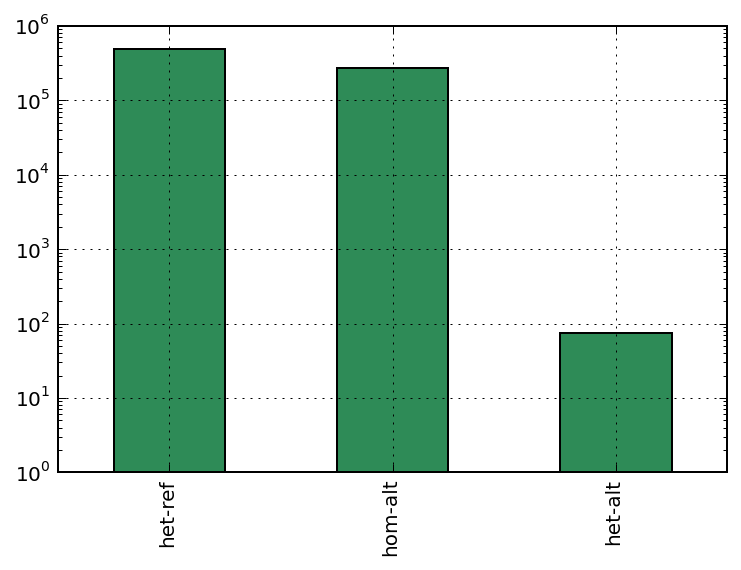

In [13]:
master_df.zygosity.value_counts().plot(kind='bar', log=True, grid=True, color='seagreen')

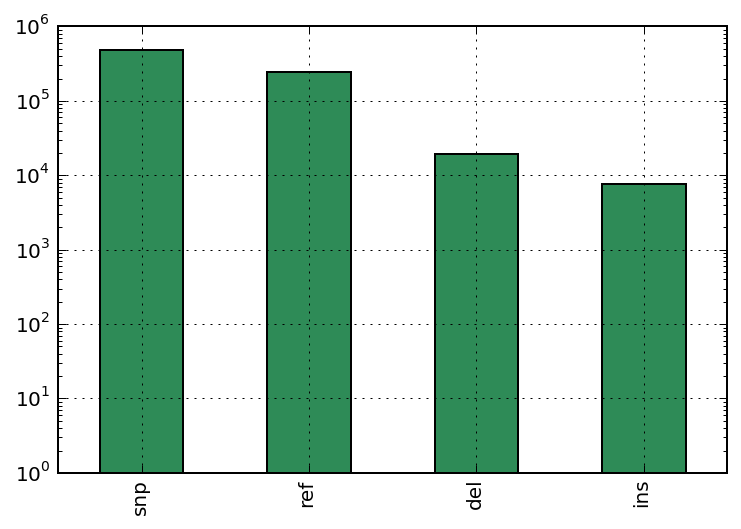

In [14]:
master_df.vartype2.value_counts().plot(kind='bar', log=True, grid=True, color='seagreen')

In [15]:
master_df.vartype2.value_counts()

snp    483986
ref    244660
del     19604
ins      7551
dtype: int64

In [16]:
len(master_df)

755801

In [17]:
master_df.head(20)

sample_ids  multiallele phase  GT1  GT2 a1 a2 zygosity  \
CHROM POS      REF ALT                                                          
22    16050075 A   G      HG03770            0     |    0    1  A  G  het-ref   
      16050115 G   A      HG01363            0     |    0    1  G  A  het-ref   
                   A      HG02334            0     |    0    1  G  A  het-ref   
                   A      HG02343            0     |    0    1  G  A  het-ref   
                   A      HG02574            0     |    0    1  G  A  het-ref   
                   A      HG03052            0     |    0    1  G  A  het-ref   
                   A      HG03354            0     |    0    1  G  A  het-ref   
                   A      HG03432            0     |    0    1  G  A  het-ref   
                   A      HG03473            0     |    0    1  G  A  het-ref   
                   A      NA18516            0     |    0    1  G  A  het-ref   
                   A      NA18858            0     |    0    1  G  A  het-ref   
                   A      NA18874            0     |    0    1  G  A  het-ref   
                   A      NA19027            0     |    0    1  G  A  het-ref   
                   A      NA19121            0     |    0    1  G  A  het-ref   
                   A      NA19137            0     |    0    1  G  A  het-ref   
                   A      NA19707            0     |    0    1  G  A  het-ref   
                   A      NA19984            0     |    0    1  G  A  het-ref   
                   A      HG02497            0     |    1    0  A  G  het-ref   
                   A      HG02536            0     |    1    0  A  G  het-ref   
                   A      HG02623            0     |    1    0  A  G  het-ref   

                       vartype1 vartype2   GT FORMAT  hom_ref_counts  \
CHROM POS      REF ALT                                                 
22    16050075 A   G        ref      snp  0|1     GT            2503   
      16050115 G   A        ref      snp  0|1     GT            2472   
                   A        ref      snp  0|1     GT            2472   
                   A        ref      snp  0|1     GT            2472   
                   A        ref      snp  0|1     GT            2472   
                   A        ref      snp  0|1     GT            2472   
                   A        ref      snp  0|1     GT            2472   
                   A        ref      snp  0|1     GT            2472   
                   A        ref      snp  0|1     GT            2472   
                   A        ref      snp  0|1     GT            2472   
                   A        ref      snp  0|1     GT            2472   
                   A        ref      snp  0|1     GT            2472   
                   A        ref      snp  0|1     GT            2472   
                   A        ref      snp  0|1     GT            2472   
                   A        ref      snp  0|1     GT            2472   
                   A        ref      snp  0|1     GT            2472   
                   A        ref      snp  0|1     GT            2472   
                   A        snp      ref  1|0     GT            2472   
                   A        snp      ref  1|0     GT            2472   
                   A        snp      ref  1|0     GT            2472   

                                                       INFO  
CHROM POS      REF ALT                                       
22    16050075 A   G    AC=1;AF=0.000199681;AN=5008;NS=2504  
      16050115 G   A    AC=32;AF=0.00638978;AN=5008;NS=2504  
                   A    AC=32;AF=0.00638978;AN=5008;NS=2504  
                   A    AC=32;AF=0.00638978;AN=5008;NS=2504  
                   A    AC=32;AF=0.00638978;AN=5008;NS=2504  
                   A    AC=32;AF=0.00638978;AN=5008;NS=2504  
                   A    AC=32;AF=0.00638978;AN=5008;NS=2504  
                   A    AC=32;AF=0.00638978;AN=5008;NS=2504  
                   A    AC=32;AF=0.

In [18]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 755801 entries, (22, 16050075, A, G) to (22, 16644712, G, C)
Data columns (total 14 columns):
sample_ids        755801 non-null object
multiallele       755801 non-null int64
phase             755801 non-null object
GT1               755801 non-null int64
GT2               755801 non-null int64
a1                755801 non-null object
a2                755801 non-null object
zygosity          755801 non-null object
vartype1          755801 non-null object
vartype2          755801 non-null object
GT                755801 non-null object
FORMAT            755801 non-null object
hom_ref_counts    755801 non-null float64
INFO              755801 non-null object
dtypes: float64(1), int64(3), object(10)
memory usage: 84.4+ MB
